Project Name: 


FBI Time Series Forecasting

Project Summary:


This project aims to develop a predictive time series model to estimate monthly crime incidents using granular, timestamped crime data (including location, type, and neighborhood). By identifying when and where crimes are most likely to occur, the model helps law enforcement:

Anticipate crime trends

Allocate resources more effectively

Enhance public safety

Beyond law enforcement, the insights can support:

Urban planning

Public safety policies

Emergency response

Community awareness campaigns

The project emphasizes the strategic use of AI and data analytics to build safer, smarter cities through proactive crime prevention and planning.

GitHub Link :

In [ ]:
https://github.com/Sravanthi-p21/FBI-Time-Series-Forecasting.git

Problem Statement :

In [ ]:
Urban areas across the United States are facing rising crime rates and increasingly complex crime patterns. Traditional methods of crime analysis often fall short in capturing spatial and temporal dynamics needed for effective decision-making.

The challenge is to develop a predictive model that can accurately forecast the number of crime incidents on a monthly basis, using detailed historical data at the day and hour level.

This model should:

Identify when (time patterns) and where (location patterns) crimes are most likely to occur

Support law enforcement agencies in optimizing patrol schedules and resource allocation

Help urban planners and public safety teams proactively address high-risk areas



 Import Libraries & Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


In [3]:
# Load training data
train_df = pd.read_csv("raw/train.csv",sep=",")


In [4]:
print(train_df.shape)
print(train_df.columns)
train_df.head()

(474565, 13)
Index(['TYPE', 'HUNDRED_BLOCK', 'NEIGHBOURHOOD', 'X', 'Y', 'Latitude',
       'Longitude', 'HOUR', 'MINUTE', 'YEAR', 'MONTH', 'DAY', 'Date'],
      dtype='object')


,TYPE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date
0,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,15.0,1999,5,12,12/05/1999
1,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,15.0,20.0,1999,5,7,07/05/1999
2,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,40.0,1999,4,23,23/04/1999
3,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,11.0,15.0,1999,4,20,20/04/1999
4,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,17.0,45.0,1999,4,12,12/04/1999


 Data Overview

In [5]:
# General info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474565 entries, 0 to 474564
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TYPE           474565 non-null  object 
 1   HUNDRED_BLOCK  474552 non-null  object 
 2   NEIGHBOURHOOD  423074 non-null  object 
 3   X              474565 non-null  float64
 4   Y              474565 non-null  float64
 5   Latitude       474565 non-null  float64
 6   Longitude      474565 non-null  float64
 7   HOUR           425200 non-null  float64
 8   MINUTE         425200 non-null  float64
 9   YEAR           474565 non-null  int64  
 10  MONTH          474565 non-null  int64  
 11  DAY            474565 non-null  int64  
 12  Date           474565 non-null  object 
dtypes: float64(6), int64(3), object(4)
memory usage: 47.1+ MB


In [6]:
# Null values
print("Null values:\n", train_df.isnull().sum())

Null values:
 TYPE                 0
HUNDRED_BLOCK       13
NEIGHBOURHOOD    51491
X                    0
Y                    0
Latitude             0
Longitude            0
HOUR             49365
MINUTE           49365
YEAR                 0
MONTH                0
DAY                  0
Date                 0
dtype: int64


In [7]:
# Unique value counts
train_df.nunique()

TYPE                 9
HUNDRED_BLOCK    20566
NEIGHBOURHOOD       24
X                84225
Y                82768
Latitude         89488
Longitude        87190
HOUR                24
MINUTE              60
YEAR                13
MONTH               12
DAY                 31
Date              4748
dtype: int64

In [8]:
# Descriptive statistics
train_df.describe(include='all')

,TYPE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date
count,474565,474552,423074,474565.000000,4.745650e+05,474565.000000,474565.000000,425200.000000,425200.000000,474565.000000,474565.000000,474565.000000,474565
unique,9,20566,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4748
top,Theft from Vehicle,OFFSET TO PROTECT PRIVACY,Central Business District,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15/06/2007
freq,153932,49365,96171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,649
mean,NaN,NaN,NaN,441028.018220,4.889023e+06,44.138029,-110.301025,13.721263,16.736047,2004.363632,6.555700,15.439253,NaN
std,NaN,NaN,NaN,150295.319332,1.665850e+06,15.039271,37.583147,6.785751,18.354675,3.850689,3.408676,8.759352,NaN
min,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000,-124.549757,0.000000,0.000000,1999.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,489916.530000,5.453572e+06,49.234871,-123.127383,9.000000,0.000000,2001.000000,4.000000,8.000000,NaN
50%,NaN,NaN,NaN,491477.850000,5.456820e+06,49.264051,-123.107058,15.000000,10.000000,2004.000000,7.000000,15.000000,NaN
75%,NaN,NaN,NaN,493610.190000,5.458622e+06,49.280300,-123.065646,19.000000,30.000000,2008.000000,9.000000,23.000000,NaN


Datetime Parsing and Basic Columns

In [9]:
# Convert to datetime if full date is available
if 'date' in train_df.columns:
    train_df['date'] = pd.to_datetime(train_df['date'])
else:
    train_df['date'] = pd.to_datetime(train_df[['YEAR', 'MONTH', 'DAY']])


# Step 1: Convert HOUR to numeric
train_df['HOUR'] = pd.to_numeric(train_df['HOUR'], errors='coerce')

# Step 2: Fill missing with median (or mode, or 0)
train_df['HOUR'] = train_df['HOUR'].fillna(train_df['HOUR'].median()).astype(int)

# Step 3: Bin hours into day parts
train_df['hour_bin'] = pd.cut(
    train_df['HOUR'],
    bins=[0, 6, 12, 18, 24],
    labels=['Night', 'Morning', 'Afternoon', 'Evening'],
    right=False,
    include_lowest=True
)

# step 4: 
train_df['day_of_week'] = train_df['date'].dt.dayofweek
train_df['is_weekend'] = train_df['day_of_week'].isin([5, 6])


INSIGHTS :

1.Date parsing enables extraction of time-based patterns (e.g., weekday, month, seasonality).
2.HOUR column cleaning makes HOUR ready for binning or use in time-based modeling
3.Hour Binning into Day Parts helps in detecting crime pattern variations by time of day (e.g., night crimes vs. day crimes).
4.Day of the Week Extraction can be used to identify weekday-vs-weekend trends.
5.Weekend Indicator helps in modeling behavioral differences in crimes between weekdays and weekends.

Handle Missing Columns

In [10]:
# Handle MINUTE:
train_df['MINUTE'] = pd.to_numeric(train_df['MINUTE'], errors='coerce').fillna(0).astype(int)

# Handle NEIGHBOURHOOD missing:
train_df['NEIGHBOURHOOD'] = train_df['NEIGHBOURHOOD'].fillna('Unknown')

# Fix date
train_df['Date'] = pd.to_datetime(train_df['Date'], errors='coerce')

#
train_df = train_df[train_df['Longitude'] != 0]


Removing outliers

In [11]:
def remove_outliers_iqr(df, columns):
    """
    Remove rows where any specified column has an IQR-based outlier.

    Parameters:
    df (pd.DataFrame): Input dataframe
    columns (list): List of column names to apply IQR filtering

    Returns:
    pd.DataFrame: Filtered DataFrame with outliers removed
    """
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Columns to clean
iqr_columns = ['Latitude', 'Longitude', 'HOUR', 'MINUTE', 'YEAR', 'MONTH', 'DAY']

# Apply outlier removal
train_df = remove_outliers_iqr(train_df, iqr_columns)


Temporal Analysis

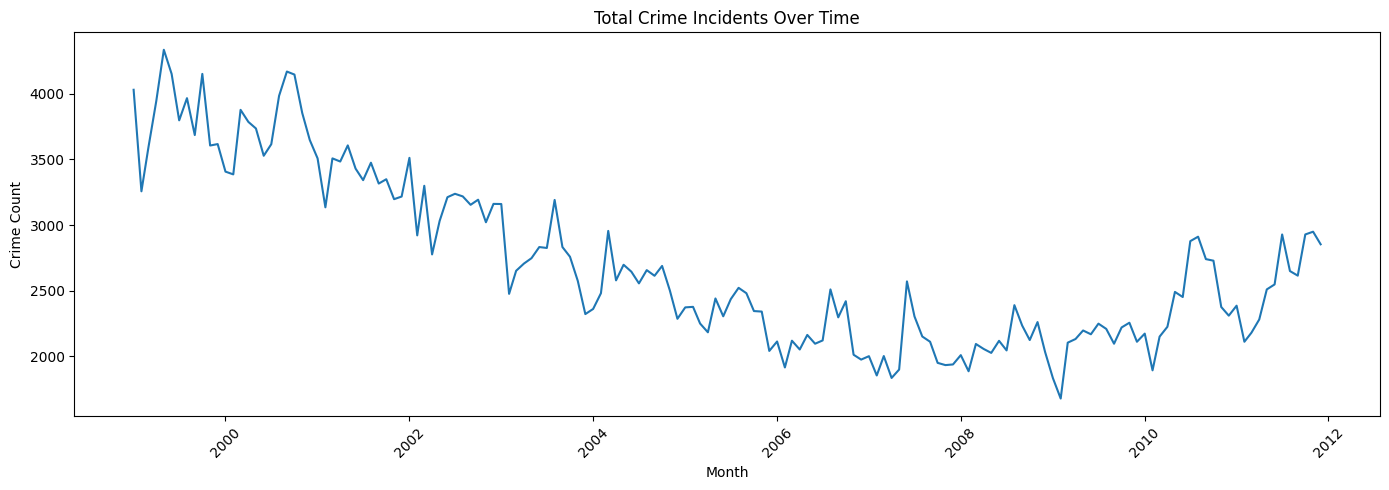

In [12]:
# Monthly trends
monthly_trends = train_df.groupby(['YEAR', 'MONTH']).size().reset_index(name='incident_count')
monthly_trends['DATE'] = pd.to_datetime(monthly_trends[['YEAR', 'MONTH']].assign(day=1))

plt.figure(figsize=(14, 5))
sns.lineplot(data=monthly_trends, x='DATE', y='incident_count')
plt.title('Total Crime Incidents Over Time')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


INSIGHTS :
1.Group and Count Incidents:
Groups the crime dataset by year and month.
Counts how many crime incidents occurred in each (year, month) pair.

2.Create a Date Column:Constructs a datetime column for each month's first day (useful for plotting time series).

3.plot the trend:
Creates a line plot using Seaborn.
X-axis: month (as datetime), Y-axis: number of incidents.
Adds title, labels, and rotates x-axis ticks for clarity.

Hourly and Daily Patterns



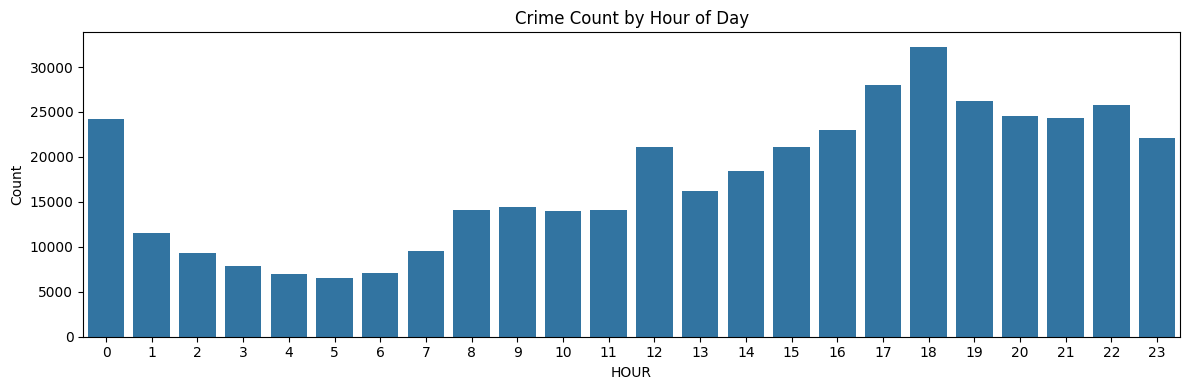

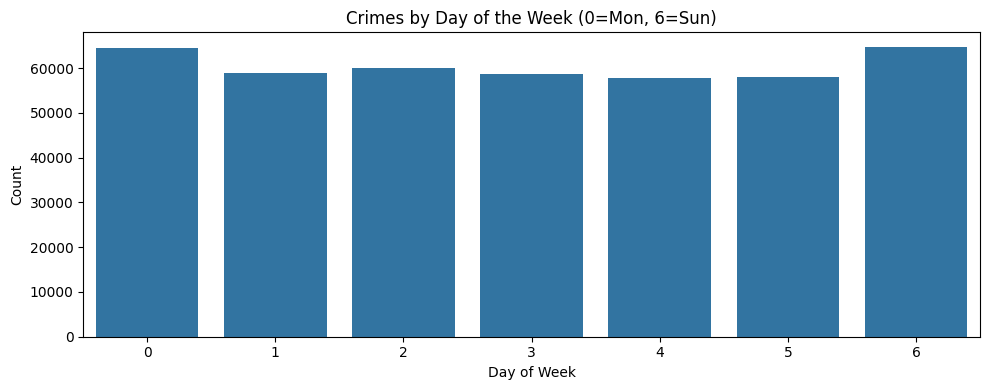

In [13]:
# Crimes by hour
plt.figure(figsize=(12, 4))
sns.countplot(data=train_df, x='HOUR')
plt.title('Crime Count by Hour of Day')
plt.xlabel('HOUR')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Crimes by day of week
plt.figure(figsize=(10, 4))
sns.countplot(data=train_df, x='day_of_week')
plt.title('Crimes by Day of the Week (0=Mon, 6=Sun)')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



Crimes count by hour of the day What it does is :

Plots the number of crimes for each hour (0 to 23). which Helps identify when crimes most frequently occur in a 24-hour period.

what crimes by day of the week  does is 

Plots the number of crimes for each day of the week (0 = Monday, 6 = Sunday).which helps identify which days are more crime-prone.

Crime Type Distribution

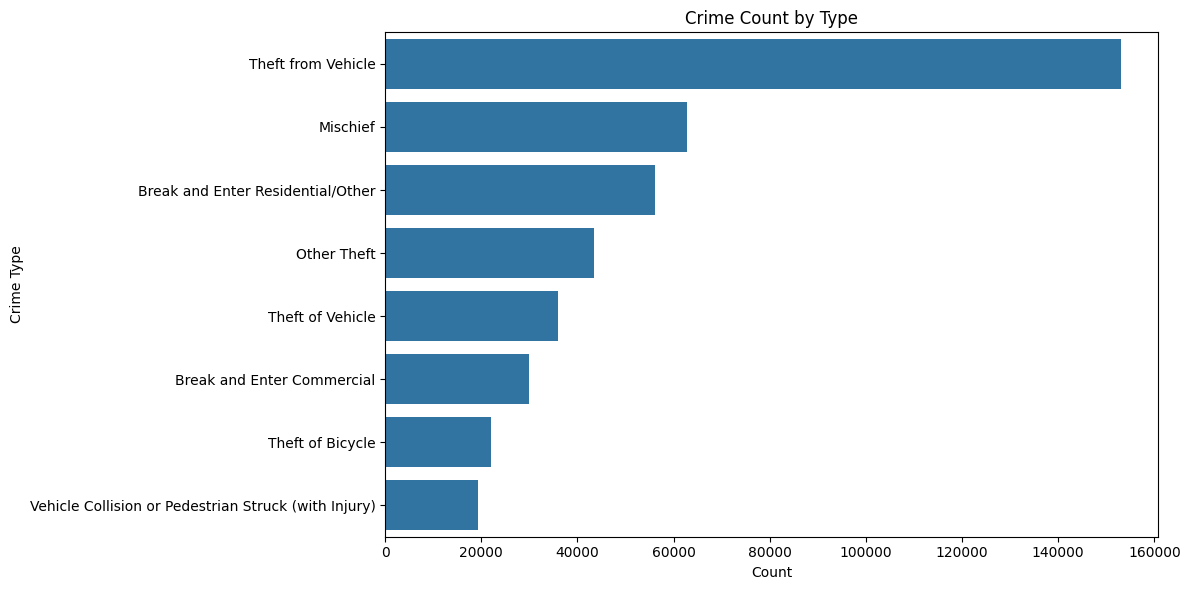

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, y='TYPE', order=train_df['TYPE'].value_counts().index)
plt.title('Crime Count by Type')
plt.xlabel('Count')
plt.ylabel('Crime Type')
plt.tight_layout()
plt.show()


Plots a horizontal bar chart showing the number of incidents per crime type.

Orders the bars by descending frequency (most common crimes at the top).

Top Neighborhoods and Blocks

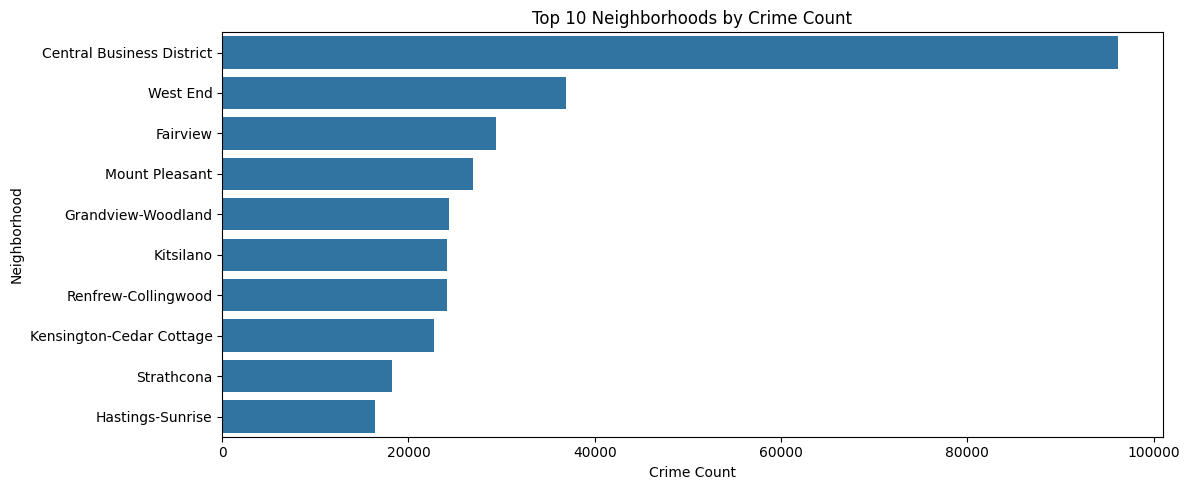

In [15]:
# Top neighborhoods
top_nhoods = train_df['NEIGHBOURHOOD'].value_counts().head(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_nhoods.values, y=top_nhoods.index)
plt.title('Top 10 Neighborhoods by Crime Count')
plt.xlabel('Crime Count')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.show()


Retrieves the 10 neighborhoods with the highest number of crime incidents.
Plots a horizontal bar chart with neighborhoods on the Y-axis and crime count on the X-axis.


To identify hotspot areas where crime is most frequent. This is useful for:
Urban safety analysis
Police resource allocation
Targeted intervention policies


Spatial Distribution (Geopandas Map)

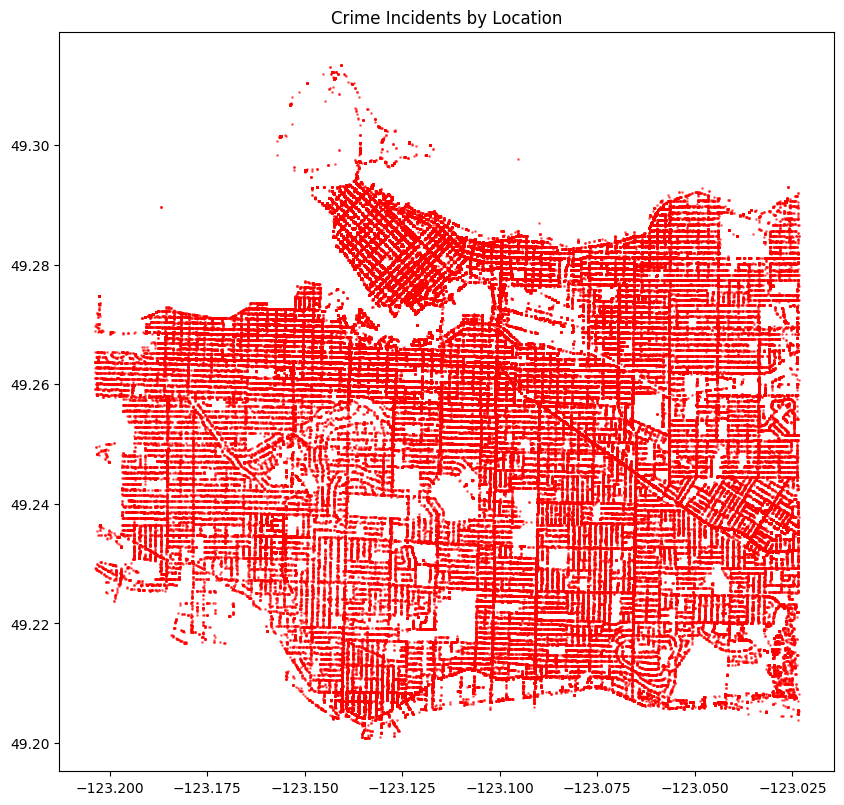

In [16]:
# Drop rows with missing coordinates
geo_df = train_df.dropna(subset=['Latitude', 'Longitude'])

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(
    geo_df, 
    geometry=gpd.points_from_xy(geo_df['Longitude'], geo_df['Latitude']),
    crs='EPSG:4326'
)

# Plot crime density map
gdf.plot(markersize=1, figsize=(10, 10), alpha=0.5, color='red')
plt.title('Crime Incidents by Location')
plt.show()


1.Remove rows with missing coordinates ensures only rows with valid geographic data are used.

2.Convert to geodataframe Creates a GeoDataFrame with geometry points using Longitude and Latitude.
  Uses WGS84 coordinate system (EPSG:4326), suitable for global mapping.

3.Plot crime density map plots all crime incident locations as red dots.

Shows spatial distribution and crime concentration zones.

To visually explore geographic patterns in crime incidents.

Identify hotspots, clusters, or unusual spread of crimes across the city.


Insights we Can Derive:
Densely packed areas may indicate crime hotspots.

Sparse or isolated dots may point to outlier incidents.

we can overlay this on a city map for better context.



Heatmap of Monthly Seasonality per Crime Type



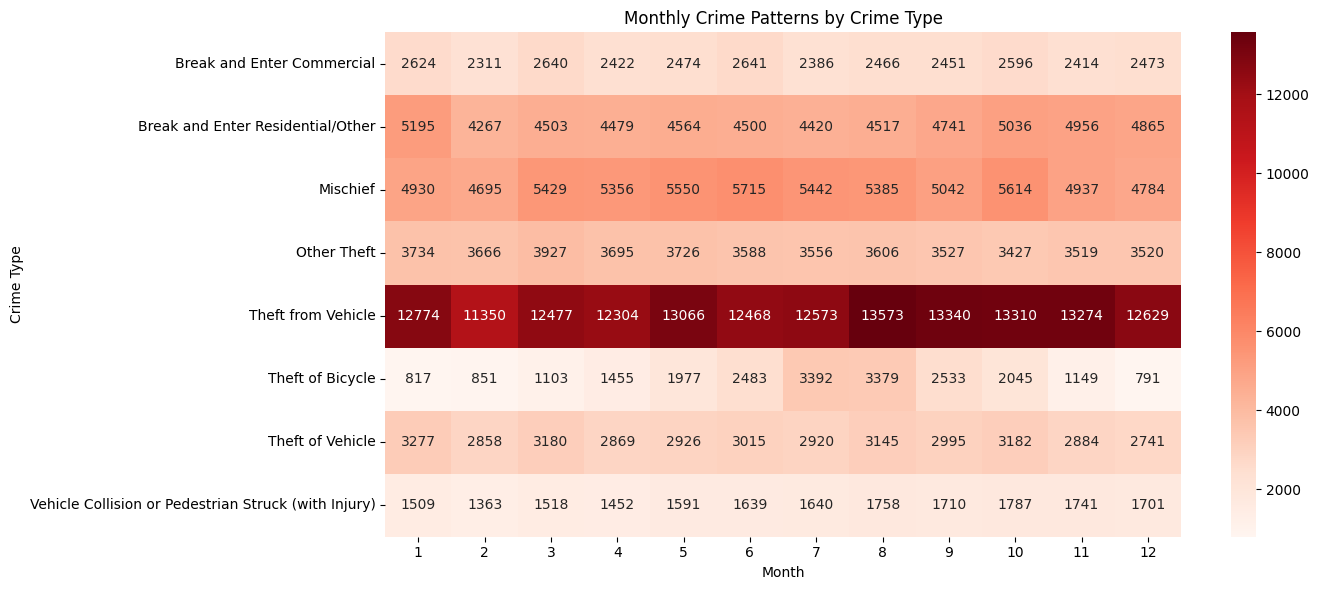

In [17]:
heatmap_data = (
    train_df.groupby(['MONTH', 'TYPE'])
    .size()
    .reset_index(name='count')
    .pivot(index='TYPE', columns='MONTH', values='count')
    .fillna(0)
)

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt='.0f')
plt.title('Monthly Crime Patterns by Crime Type')
plt.xlabel('Month')
plt.ylabel('Crime Type')
plt.tight_layout()
plt.show()


1.Aggregates Monthly Crime Counts by Type:
Groups data by MONTH and TYPE of crime.
Counts the number of incidents for each combination.

2.Transforms Data into Pivot Table:
Rows: Crime Types
Columns: Months
Cells: Number of crimes

3.Handles Missing Data:
Replaces any missing values (i.e., zero incidents) with 0.

4.Plots a Heatmap:
Uses color intensity to show higher or lower crime counts.
annot=True displays the actual numbers in each cell.

*Purpose*:
To visualize seasonal patterns in different crime types across months.

Insights we Can Derive:

Seasonal Trends:
Identify if certain crime types (e.g., theft, assault) peak in specific months (e.g., summer or holidays).

Type-specific Patterns:
Some crimes might be consistent year-round, others more sporadic or seasonal.


Target Distribution Check (for modeling)

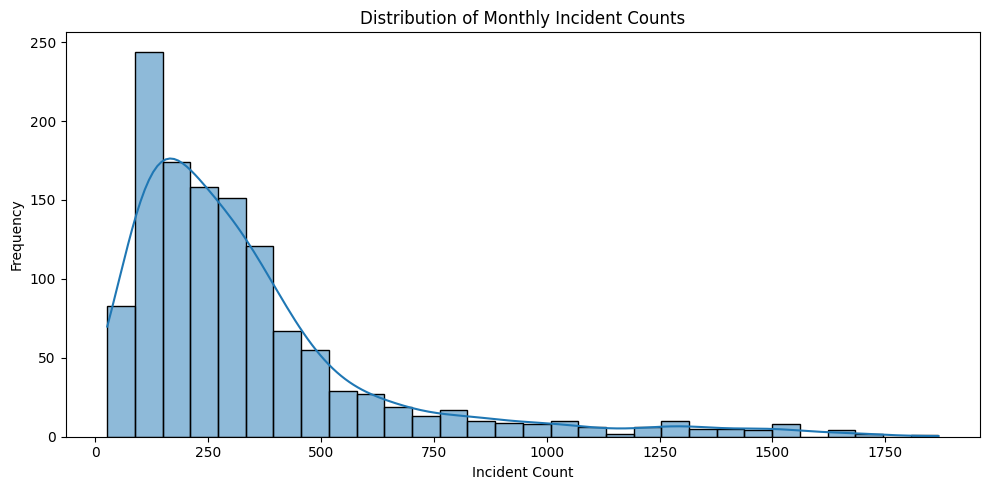

Skewness: 2.206712849869282
Highly right-skewed — consider log transformation.


In [18]:
target_df = train_df.groupby(['YEAR', 'MONTH', 'TYPE']).size().reset_index(name='incident_count')

plt.figure(figsize=(10, 5))
sns.histplot(target_df['incident_count'], bins=30, kde=True)
plt.title('Distribution of Monthly Incident Counts')
plt.xlabel('Incident Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Check skewness
print("Skewness:", target_df['incident_count'].skew())



skew_val = target_df['incident_count'].skew()
if skew_val > 1:
    print("Highly right-skewed — consider log transformation.")
elif skew_val > 0.5:
    print("Moderate skew — some transformation may help.")
else:
    print("Fairly symmetric — transformation likely not needed.")


FEATURE ENGINEERING

Temporal features

In [19]:
# Extract standard time-based features
train_df['DATE'] = pd.to_datetime(train_df[['YEAR', 'MONTH', 'DAY']])
train_df['day_of_week'] = train_df['DATE'].dt.dayofweek
train_df['is_weekend'] = train_df['day_of_week'].isin([5, 6]).astype(int)
train_df['hour_bin'] = pd.cut(train_df['HOUR'], bins=[0, 6, 12, 18, 24],
                              labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)

# Optional: encode hour_bin
train_df = pd.get_dummies(train_df, columns=['hour_bin'], drop_first=True)

1. Construct Date ColumnCombines YEAR, MONTH, and DAY into a single datetime column.

2. Day of the Week Extracts day of the week (0=Monday, 6=Sunday).

Useful to capture weekly crime trends.

3. Weekend Indicator Creates a binary column:

  1 for Saturday and Sunday

  0 otherwise

Useful for identifying weekend-related crime patterns.

4. Binning Hours into Time of Day

   Segments HOUR into time-of-day categories.

   Helps the model generalize better than raw hours.

5. One-Hot Encode hour_bin
   Converts the hour_bin into multiple binary columns:

   Example: hour_bin_Morning, hour_bin_Afternoon, hour_bin_Evening

   Drops one column (here, "Night") to avoid multicollinearity.



Spatial Features


In [20]:
# Drop exact addresses — too granular. Use neighborhood or coordinate clusters.

# 1. Encode neighborhoods (one-hot or label encode)
train_df['NEIGHBOURHOOD'] = train_df['NEIGHBOURHOOD'].astype(str)
train_df['neighborhood_encoded'] = train_df['NEIGHBOURHOOD'].astype('category').cat.codes
pd.get_dummies(train_df['NEIGHBOURHOOD'], prefix='nhood')


# 2. Optionally cluster coordinates (e.g., using KMeans)
from sklearn.cluster import KMeans

coords = train_df[['Latitude', 'Longitude']].dropna()
kmeans = KMeans(n_clusters=20, random_state=42)
train_df.loc[coords.index, 'location_cluster'] = kmeans.fit_predict(coords)

train_df['location_cluster'] = train_df['location_cluster'].fillna(-1).astype(int)

Encode NEIGHBOURHOOD :
Assigns each neighborhood a unique numeric code.
Efficient for tree-based models or as an input to embeddings in deep learning.

Cluster Locations using KMeans :
Groups nearby (Latitude, Longitude) pairs into 20 spatial clusters.
Each row is assigned a cluster ID from 0 to 19.
Helps capture geo-based crime patterns like hotspots.
Assigns -1 to rows with missing coordinates (if any).

Crime Type Encoding


C:\Users\anish\AppData\Local\Temp\ipykernel_13228\318944967.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_counts.values, y=crime_counts.index, palette="viridis")


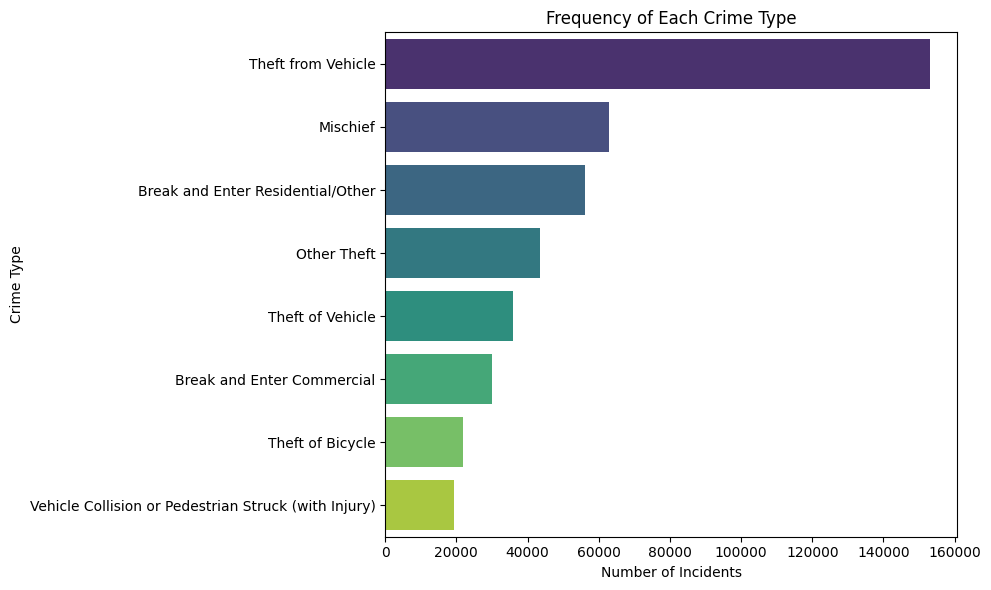

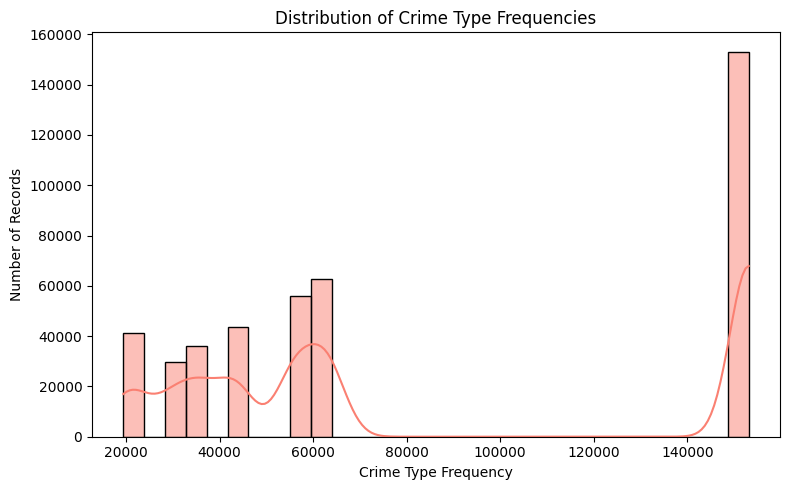

In [38]:
# Frequency encoding for crime type
crime_counts = train_df['TYPE'].value_counts()
train_df['crime_type_freq'] = train_df['TYPE'].map(crime_counts)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=crime_counts.values, y=crime_counts.index, palette="viridis")
plt.title('Frequency of Each Crime Type')
plt.xlabel('Number of Incidents')
plt.ylabel('Crime Type')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(train_df['crime_type_freq'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Crime Type Frequencies')
plt.xlabel('Crime Type Frequency')
plt.ylabel('Number of Records')
plt.tight_layout()
plt.show()



Count Frequency of Each Crime Type:
Creates a Series with:
index: Unique crime types
values: Count of how many times each type appears

Map Frequencies to Dataset:
For each row, replaces TYPE with its frequency
Result: crime_type_freq holds the number of occurrences of that crime type



 Lag Features & Rolling Stats


In [40]:
# Create monthly grouped data
monthly_df = (
    train_df.groupby(['YEAR', 'MONTH', 'TYPE'])
    .size()
    .reset_index(name='incident_count')
)

# Combine year and month into date
monthly_df['DATE'] = pd.to_datetime(monthly_df[['YEAR', 'MONTH']].assign(day=1))
monthly_df = monthly_df.sort_values(['TYPE', 'DATE'])

# Lag features
for lag in [1, 2, 3]:
    monthly_df[f'lag_{lag}'] = (
        monthly_df.groupby('TYPE')['incident_count']
        .shift(lag)
    )

# Rolling mean features
monthly_df['rolling_mean_3'] = (
    monthly_df.groupby('TYPE')['incident_count']
    .shift(1)
    .rolling(window=3)
    .mean()
)

monthly_df['rolling_std_3'] = (
    monthly_df.groupby('TYPE')['incident_count']
    .shift(1)
    .rolling(window=3)
    .std()
)

1. Monthly Aggregation :
Groups data by year, month, and crime type.

Computes monthly incident count for each crime type.

2. Date Construction :

Constructs a proper DATE column and sorts by time within each crime type.

 Lag Features:
 For each TYPE, it shifts the incident count by 1, 2, and 3 months.

Useful for models to learn temporal dependencies (e.g., "last month’s count").

 Rolling Features (Window = 3 Months):

These compute the 3-month rolling average and standard deviation of past incident counts.

Help models understand recent trends and volatility.



In [45]:
monthly_df.head()

,YEAR,MONTH,TYPE,incident_count,DATE,lag_1,lag_2,lag_3,rolling_mean_3,rolling_std_3
0,1999,1,Break and Enter Commercial,302,1999-01-01,NaN,NaN,NaN,NaN,NaN
8,1999,2,Break and Enter Commercial,254,1999-02-01,302.0,NaN,NaN,NaN,NaN
16,1999,3,Break and Enter Commercial,290,1999-03-01,254.0,302.0,NaN,NaN,NaN
24,1999,4,Break and Enter Commercial,264,1999-04-01,290.0,254.0,302.0,282.000000,24.979992
32,1999,5,Break and Enter Commercial,291,1999-05-01,264.0,290.0,254.0,269.333333,18.583146


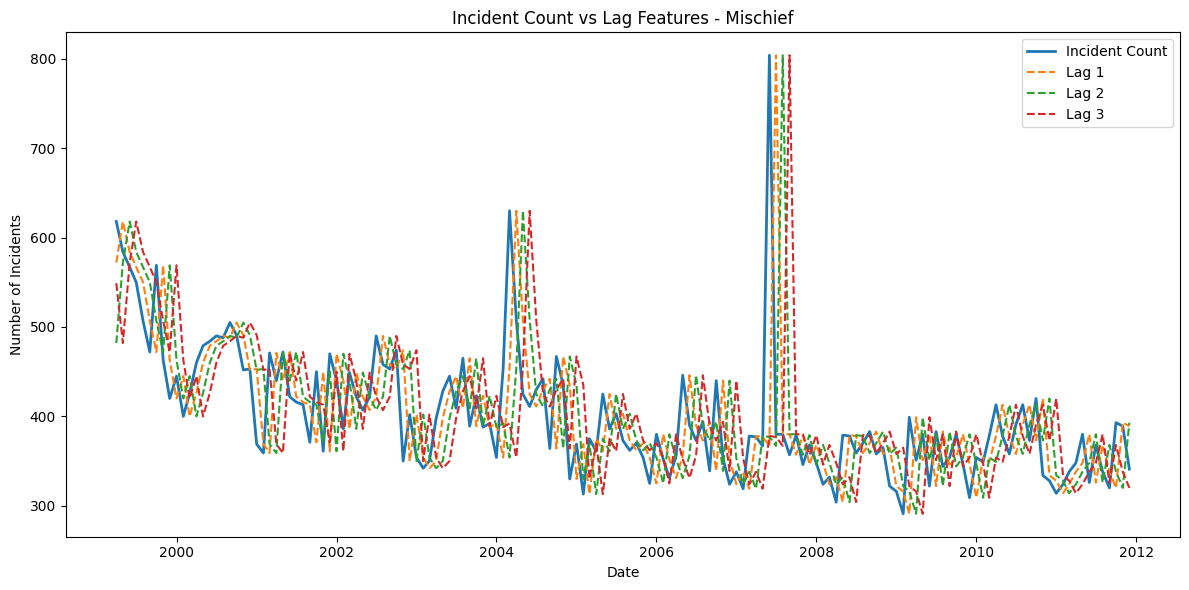

In [48]:
import matplotlib.pyplot as plt

# Sample data: filter for one crime type
df = monthly_df[monthly_df['TYPE'] == 'Mischief'].dropna()

plt.figure(figsize=(12, 6))
plt.plot(df['DATE'], df['incident_count'], label='Incident Count', linewidth=2)
plt.plot(df['DATE'], df['lag_1'], label='Lag 1', linestyle='--')
plt.plot(df['DATE'], df['lag_2'], label='Lag 2', linestyle='--')
plt.plot(df['DATE'], df['lag_3'], label='Lag 3', linestyle='--')
plt.title('Incident Count vs Lag Features - Mischief')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.legend()
plt.tight_layout()
plt.show()


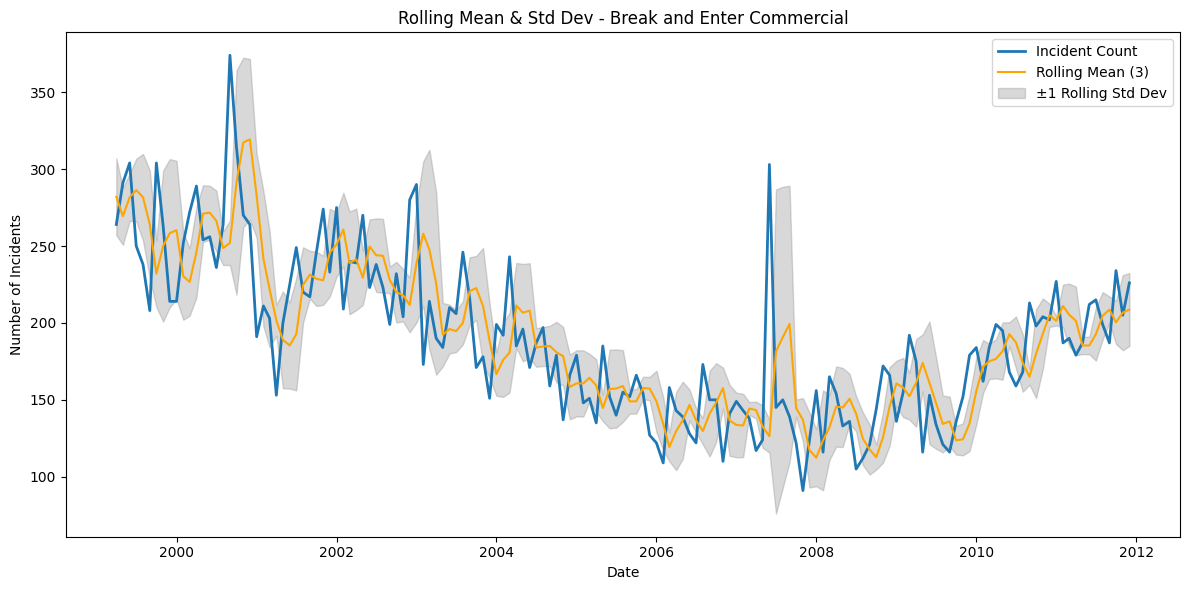

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['DATE'], df['incident_count'], label='Incident Count', linewidth=2)
plt.plot(df['DATE'], df['rolling_mean_3'], label='Rolling Mean (3)', color='orange')
plt.fill_between(
    df['DATE'],
    df['rolling_mean_3'] - df['rolling_std_3'],
    df['rolling_mean_3'] + df['rolling_std_3'],
    color='gray', alpha=0.3, label='±1 Rolling Std Dev'
)
plt.title('Rolling Mean & Std Dev - Mischief')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.legend()
plt.tight_layout()
plt.show()


 Target Aggregation Features


In [ ]:
# Mean incident count per neighborhood
neighborhood_crime = train_df.groupby('NEIGHBOURHOOD').size().reset_index(name='nhood_crime_count')
train_df = train_df.merge(neighborhood_crime, on='NEIGHBOURHOOD', how='left')

# Mean incident per crime type & day of week
crime_dow = train_df.groupby(['TYPE', 'day_of_week']).size().reset_index(name='crime_dow_count')
train_df = train_df.merge(crime_dow, on=['TYPE', 'day_of_week'], how='left')


 Neighborhood-Level Crime Count:
 
Calculates total number of crimes per neighborhood.

Merged back into the main dataset as a new feature:
 nhood_crime_count
 Crime Type by Day-of-Week Count

Class Imbalance Check



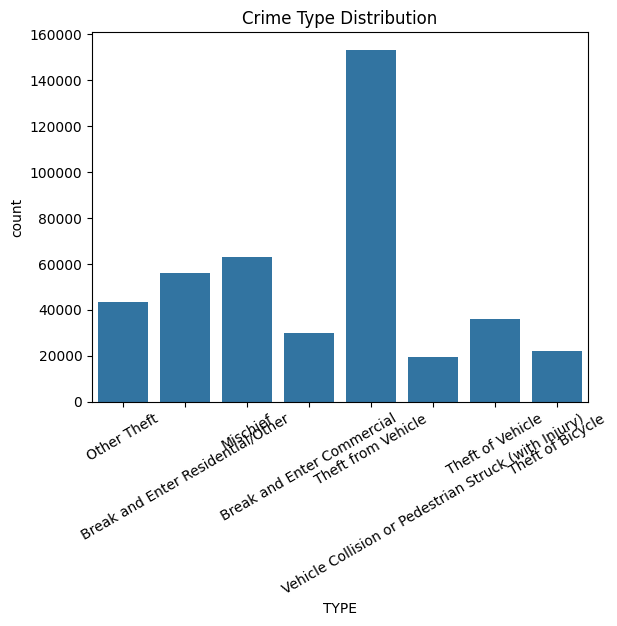

In [24]:
# Check class balance (if you're predicting per crime_type)
import matplotlib.pyplot as plt
sns.countplot(x='TYPE', data=train_df)
plt.title("Crime Type Distribution")
plt.xticks(rotation=30)
plt.show()



In [25]:
train_df.head()

,TYPE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,...,is_weekend,DATE,hour_bin_Morning,hour_bin_Afternoon,hour_bin_Evening,neighborhood_encoded,location_cluster,crime_type_freq,nhood_crime_count,crime_dow_count
0,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16,15,1999,...,0,1999-05-12,False,True,False,19,11,43491,18281,6175
1,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,15,20,1999,...,0,1999-05-07,False,True,False,19,11,43491,18281,6171
2,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16,40,1999,...,0,1999-04-23,False,True,False,19,11,43491,18281,6171
3,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,11,15,1999,...,0,1999-04-20,True,False,False,19,11,43491,18281,5394
4,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,17,45,1999,...,0,1999-04-12,False,True,False,19,11,43491,18281,6348


In [26]:
monthly_df.head()

,YEAR,MONTH,TYPE,incident_count,DATE,lag_1,lag_2,lag_3,rolling_mean_3,rolling_std_3
0,1999,1,Break and Enter Commercial,302,1999-01-01,NaN,NaN,NaN,NaN,NaN
8,1999,2,Break and Enter Commercial,254,1999-02-01,302.0,NaN,NaN,NaN,NaN
16,1999,3,Break and Enter Commercial,290,1999-03-01,254.0,302.0,NaN,NaN,NaN
24,1999,4,Break and Enter Commercial,264,1999-04-01,290.0,254.0,302.0,282.000000,24.979992
32,1999,5,Break and Enter Commercial,291,1999-05-01,264.0,290.0,254.0,269.333333,18.583146


 Final Engineered Dataset


In [27]:
# Final model input (for time series models or regression)
final_df = monthly_df.dropna(subset=['lag_1', 'lag_2', 'rolling_mean_3'])

X = final_df.drop(columns=['incident_count', 'DATE'])
y = final_df['incident_count']

In [28]:
X

,YEAR,MONTH,TYPE,lag_1,lag_2,lag_3,rolling_mean_3,rolling_std_3
24,1999,4,Break and Enter Commercial,290.0,254.0,302.0,282.000000,24.979992
32,1999,5,Break and Enter Commercial,264.0,290.0,254.0,269.333333,18.583146
40,1999,6,Break and Enter Commercial,291.0,264.0,290.0,281.666667,15.307950
48,1999,7,Break and Enter Commercial,304.0,291.0,264.0,286.333333,20.404248
56,1999,8,Break and Enter Commercial,250.0,304.0,291.0,281.666667,28.183920
...,...,...,...,...,...,...,...,...
1215,2011,8,Vehicle Collision or Pedestrian Struck (with I...,149.0,162.0,141.0,150.666667,10.598742
1223,2011,9,Vehicle Collision or Pedestrian Struck (with I...,146.0,149.0,162.0,152.333333,8.504901
1231,2011,10,Vehicle Collision or Pedestrian Struck (with I...,142.0,146.0,149.0,145.666667,3.511885
1239,2011,11,Vehicle Collision or Pedestrian Struck (with I...,133.0,142.0,146.0,140.333333,6.658328


In [29]:
X.shape

(1224, 8)

In [30]:
y

24      264
32      291
40      304
48      250
56      238
       ... 
1215    146
1223    142
1231    133
1239    158
1247    127
Name: incident_count, Length: 1224, dtype: int64

In [31]:
y.shape

(1224,)

Modelling phase

Break and Enter Commercial RMSE: 29.01
Break and Enter Residential/Other RMSE: 64.50
Mischief RMSE: 37.68
Other Theft RMSE: 24.32
Theft from Vehicle RMSE: 228.54
Theft of Bicycle RMSE: 45.33
Theft of Vehicle RMSE: 42.40
Vehicle Collision or Pedestrian Struck (with Injury) RMSE: 17.54


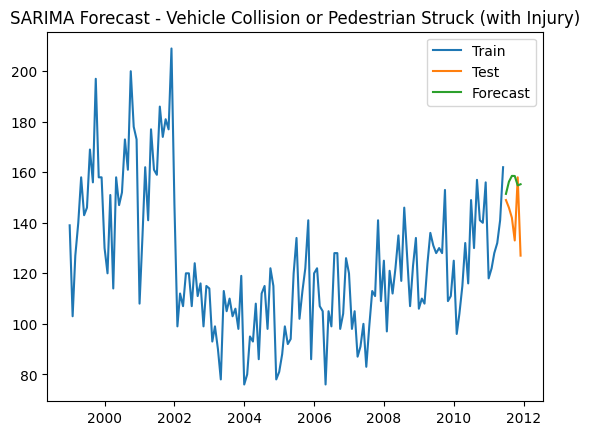

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np


for TYPE in monthly_df['TYPE'].unique():
    ts = monthly_df[monthly_df['TYPE'] == TYPE][['DATE', 'incident_count']]
    ts = ts.set_index('DATE').asfreq('MS')
    ts['incident_count'] = ts['incident_count'].fillna(0)

    #  Skip series that are too short
    if len(ts) < 12:
        print(f"Skipping {TYPE}: not enough data ({len(ts)} months)")
        continue

    train_ts = ts.iloc[:-6]
    test_ts = ts.iloc[-6:]

    #  Check for valid data
    if train_ts['incident_count'].sum() == 0:
        print(f"Skipping {TYPE}: train set has only zeros")
        continue

    try:
        model = SARIMAX(train_ts['incident_count'],
                        order=(1, 1, 1),
                        seasonal_order=(1, 1, 1, 12),
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        sarima_result = model.fit(disp=False)

        forecast = sarima_result.predict(start=test_ts.index[0], end=test_ts.index[-1])
        rmse = np.sqrt(mean_squared_error(test_ts['incident_count'], forecast))
        

        print(f"{TYPE} RMSE: {rmse:.2f}")

    except Exception as e:
        print(f"Failed for {TYPE}: {e}")


        
# Plot
import matplotlib.pyplot as plt
plt.plot(train_ts.index, train_ts['incident_count'], label='Train')
plt.plot(test_ts.index, test_ts['incident_count'], label='Test')
plt.plot(forecast.index, forecast, label='Forecast')
plt.legend(); plt.title(f'SARIMA Forecast - {TYPE}')
plt.show()




XGBoost


C:\Users\anish\AppData\Local\Temp\ipykernel_13228\2590753472.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['crime_type_encoded'] = final_df['TYPE'].astype('category').cat.codes
C:\Users\anish\AppData\Local\Temp\ipykernel_13228\2590753472.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['month_sin'] = np.sin(2 * np.pi * X['MONTH']/12)  # Add seasonality
C:\Users\anish\AppData\Local\Temp\ipykernel_13228\2590753472.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

XGBoost RMSE: 36.61
XGBoost MAE: 29.03


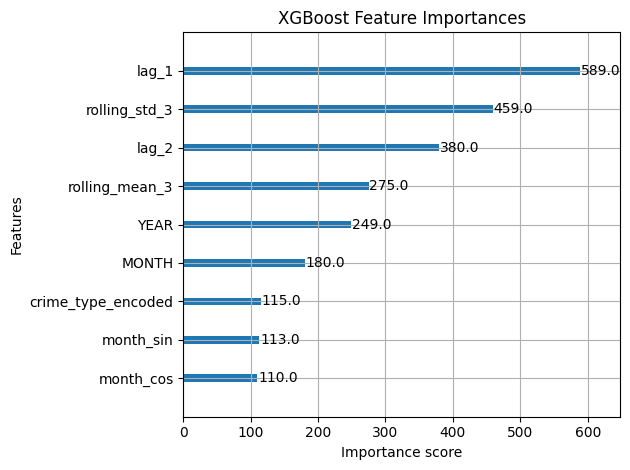

In [51]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Drop NA (lag/rolling features)
final_df = monthly_df.dropna(subset=['lag_1', 'lag_2', 'rolling_mean_3'])

# Features and target
X = final_df[['lag_1', 'lag_2', 'rolling_mean_3', 'rolling_std_3', 'YEAR', 'MONTH']]  # You can add more features
y = final_df['incident_count']

# Encode crime_type if needed
X['crime_type_encoded'] = final_df['TYPE'].astype('category').cat.codes
X['month_sin'] = np.sin(2 * np.pi * X['MONTH']/12)  # Add seasonality
X['month_cos'] = np.cos(2 * np.pi * X['MONTH']/12)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train model
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"XGBoost RMSE: {rmse:.2f}")
print(f"XGBoost MAE: {mae:.2f}")

import matplotlib.pyplot as plt

xgb.plot_importance(model)
plt.title("XGBoost Feature Importances")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2],
    'min_child_weight': [1, 5, 10]
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,
    cv=3,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

search.fit(X_train, y_train)

print("Best RMSE:", -search.best_score_)
print("Best params:", search.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best RMSE: 91.92690912882487
Best params: {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.6}


Random Forest Regressor

In [54]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=50, max_depth=8, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("Random Forest mae:", (mean_absolute_error(y_test, rf_pred)))


Random Forest RMSE: 32.74708866728067
Random Forest mae: 27.322235317349268


Best RF Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10}


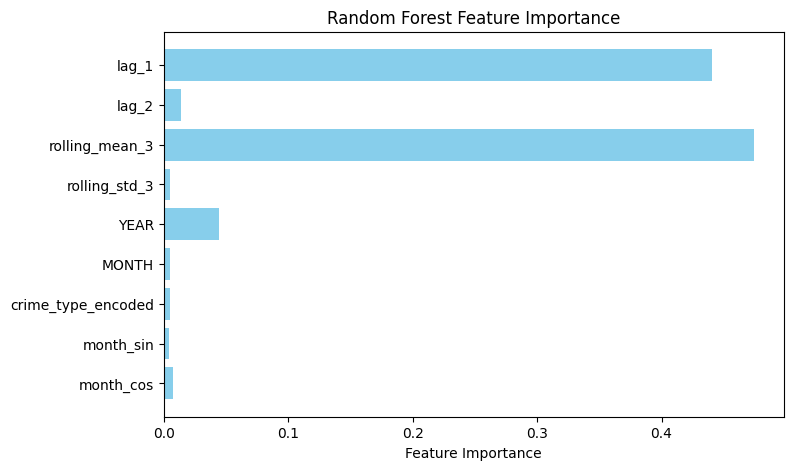

In [56]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=20,
    scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1, random_state=42
)

random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_

print("Best RF Parameters:", random_search.best_params_)

import matplotlib.pyplot as plt
importances = model.feature_importances_
features = X_train.columns

plt.figure(figsize=(8,5))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.show()
